## Notes
- type a function name with a question mark to get help.
```pd.concat?```
- Tab is for autocompletion

## Import modules, set global setting etc.

In [4]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set_context('paper', font_scale=2)

In [5]:
# This section has some test and auxiliary things and is unimportant.
# jupyter console --existing kernel-ddfb5aad-7753-4a77-981e-984dd2d34cad.json


## Heatmap for changes in protein

In [7]:
# Read in the data from the Excel spreadsheet. 
d = pd.read_excel(io='data/Proteomics Un and Sat Fat Heatmaps Data Analysis Panels.xlsx',
                  sheetname='Fatty Acid', header=None)

# The data is messy. Initial cleaning:
# Select columns that contain the relevant data
d = d[[21,25,26,27]]
# Set column names to a second row in the current data
d.columns = d.ix[1,:]
# Remove missing data (na)
d = d.ix[2:,:].dropna()
# Set the row names (index) to gene names
d = d.set_index(keys='Gene name', drop=True)

# This is mostly cosmetic, but will show up in plots. Name the index and columns:
d.columns.names = ['variable']
d.index.names = ['gene']

# For each column in the dataset, change the variable type to float,
# so that the program treats them as numbers
# d[c] returns the column with column name == c
for c in d.columns:
    d[c] = d[c].astype(float)

# Sort the dataset according to values in th column 'HFD'
d = d.sort_values(by='HFD', ascending=False)

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Acox1 to Acot13
Data columns (total 3 columns):
LFD    30 non-null float64
SFD    30 non-null float64
HFD    30 non-null float64
dtypes: float64(3)
memory usage: 960.0+ bytes


In [5]:
d

variable,LFD,SFD,HFD
gene,,,
Acox1,0.0,14.648063,126.685547
Acad11,0.0,-24.686184,49.644887
Hsd17b4,0.0,23.664884,33.893874
Acsl1,0.0,42.270700,23.525688
Cd36,0.0,-7.497351,8.154473
Cpt2,0.0,1.866005,5.850907
Ech1,0.0,-19.112419,5.733734
Acadv,0.0,0.791227,4.008306
Acadm,0.0,29.180182,2.933231


Sorry for the warning, my bad


/home/perza/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


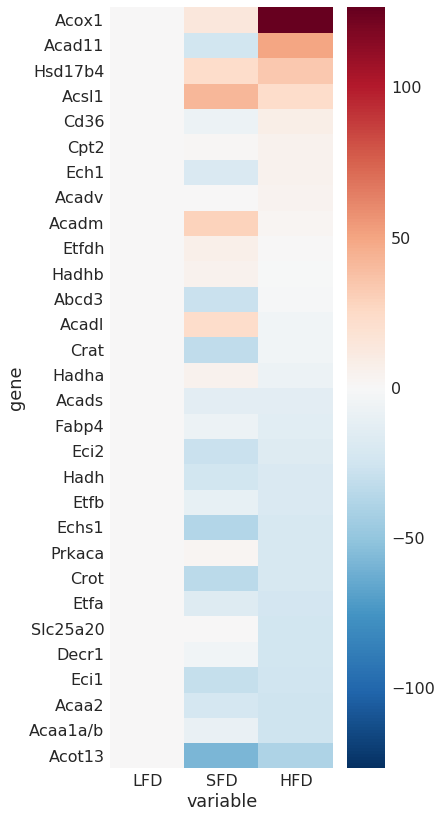

In [11]:
plt.figure(figsize=(5,14))
print('Sorry for the warning, my bad')
sns.heatmap(d);#, square=True)

## Analysis of the 'Report 3663 ... .csv' file

First, I'd like to load the data and just play around with it.

In [1]:
r = pd.read_csv('data/Report 3663 hvr bumsoo gastroc 4krebs cycle QEx 4-11-17.csv', sep=',')

In [2]:
# The dimensionality
r.shape

(60, 15)

In [14]:
# What are the variables?
r.columns

Index(['Protein Name', 'Peptide', '17apr1104 Total Area',
       '17apr1107 Total Area', '17apr1109 Total Area', '17apr1110 Total Area',
       '17apr1112 Total Area', '17apr1113 Total Area', '17apr1114 Total Area',
       '17apr1105 Total Area', '17apr1106 Total Area', '17apr1108 Total Area',
       '17apr1111 Total Area', '17apr1115 Total Area', '17apr1116 Total Area'],
      dtype='object')

In [25]:
# What type are the variables?
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
Protein Name            60 non-null object
Peptide                 60 non-null object
17apr1104 Total Area    60 non-null int64
17apr1107 Total Area    60 non-null int64
17apr1109 Total Area    60 non-null int64
17apr1110 Total Area    60 non-null int64
17apr1112 Total Area    60 non-null int64
17apr1113 Total Area    60 non-null int64
17apr1114 Total Area    60 non-null int64
17apr1105 Total Area    60 non-null int64
17apr1106 Total Area    60 non-null int64
17apr1108 Total Area    60 non-null int64
17apr1111 Total Area    60 non-null int64
17apr1115 Total Area    60 non-null int64
17apr1116 Total Area    60 non-null int64
dtypes: int64(13), object(2)
memory usage: 7.1+ KB


In [16]:
# How do the first few rows of the data look like?
r.head()

,Protein Name,Peptide,17apr1104 Total Area,17apr1107 Total Area,17apr1109 Total Area,17apr1110 Total Area,17apr1112 Total Area,17apr1113 Total Area,17apr1114 Total Area,17apr1105 Total Area,17apr1106 Total Area,17apr1108 Total Area,17apr1111 Total Area,17apr1115 Total Area,17apr1116 Total Area
0,iRT tryp bsa,LSSPATLNSR,12735518720,10775984128,10771745792,11162874880,10267098112,12784249856,15878536192,10672226304,11638273024,11382902784,11689191424,15801290752,10698511360
1,iRT tryp bsa,IVTDITK,4170007552,3744199168,4077380608,3282439680,3214295552,3306755072,3290603520,3839000320,3700740608,3913244160,3810725376,3536502016,2917545728
2,iRT tryp bsa,AEFVEVTK,5502628864,5021342208,5474810368,4818241536,4929344512,4854626304,4611969024,5374321152,5080513536,5388574720,5107589120,4725223424,4032978176
3,iRT tryp bsa,VATVSLPR,37694287872,32533819392,32199745536,30756665344,30062743552,31382407168,29299140608,33095100416,35671891968,34422497280,31389708288,30717087744,25397559296
4,iRT tryp bsa,YIYEIAR,4523052544,4243548672,4516216320,3748730368,4047535872,3958287872,3579934208,4287562240,4176151296,4438282752,3779331328,3684813056,3291036672


In [17]:
# Some of the vairables are numeric. What is the distribution?
r.describe()

,17apr1104 Total Area,17apr1107 Total Area,17apr1109 Total Area,17apr1110 Total Area,17apr1112 Total Area,17apr1113 Total Area,17apr1114 Total Area,17apr1105 Total Area,17apr1106 Total Area,17apr1108 Total Area,17apr1111 Total Area,17apr1115 Total Area,17apr1116 Total Area
count,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,2.601792e+09,2.082624e+09,2.081531e+09,2.126232e+09,2.137473e+09,2.165214e+09,2.239541e+09,2.565121e+09,2.951479e+09,2.672333e+09,2.294461e+09,2.191101e+09,2.057150e+09
std,6.139220e+09,5.634321e+09,4.778816e+09,4.618605e+09,4.564903e+09,4.828872e+09,5.600920e+09,6.185820e+09,7.154359e+09,5.618072e+09,5.304225e+09,4.655154e+09,5.011111e+09
min,2.716582e+07,1.283501e+07,1.489381e+07,3.070368e+07,2.538468e+07,2.673612e+07,1.693095e+07,3.009051e+06,5.593928e+06,2.704993e+06,2.776932e+06,2.783603e+06,2.408817e+06
25%,3.320397e+08,1.526086e+08,2.122367e+08,3.282417e+08,2.688990e+08,2.434735e+08,2.127409e+08,2.066274e+08,3.466008e+08,2.877190e+08,2.082179e+08,2.910920e+08,1.650630e+08
50%,6.807708e+08,3.397550e+08,4.554736e+08,5.483997e+08,5.958339e+08,6.324446e+08,5.171123e+08,5.438139e+08,8.988300e+08,8.119561e+08,5.614191e+08,6.455946e+08,4.104041e+08
75%,2.076005e+09,9.584904e+08,1.680705e+09,2.273160e+09,2.111590e+09,1.870993e+09,1.458436e+09,1.933416e+09,2.876599e+09,2.796670e+09,2.046472e+09,2.092636e+09,1.695510e+09
max,3.769429e+10,3.253382e+10,3.219975e+10,3.075667e+10,3.006274e+10,3.138241e+10,2.951427e+10,3.436139e+10,4.294157e+10,3.442250e+10,3.138971e+10,3.071709e+10,2.863216e+10


In [24]:
# What is the value of 3th element of the 5th row?
r.ix[5,3]

5055415808

Okay, now for some more advanced stuff.

In [18]:
# What are unique entries in 'Protein name' column and how many of each are there?
r['Protein Name'].value_counts()

iRT tryp bsa    10
Idh2             3
Bsa              3
Suclg1           3
Fh1              3
Sdhb             2
Pdha1            2
Idh3g            2
Sdhc             2
Dlst             2
Cs               2
Idh1             2
Mdh2             2
Aco2             2
Pdhb             2
Mdh1             2
Idh3a            2
Sdha             2
Dld              2
Ogdh             2
Slc25a11         2
Dlat             2
Idh3b            2
Sucla2           2
Name: Protein Name, dtype: int64

Assuming each protein is a group, what are mean values for each 'Protein Name'?
groupby is a very useful method of a pandas DataFrame object that allows you to apply an arbitrary function to subsets grouped with respect to a column in the DataFrame.

> r.groupby('Protein Name').std()

> r.groupby('Protein Name').sum()

In [19]:
means = r.groupby('Protein Name').mean()
means

,17apr1104 Total Area,17apr1107 Total Area,17apr1109 Total Area,17apr1110 Total Area,17apr1112 Total Area,17apr1113 Total Area,17apr1114 Total Area,17apr1105 Total Area,17apr1106 Total Area,17apr1108 Total Area,17apr1111 Total Area,17apr1115 Total Area,17apr1116 Total Area
Protein Name,,,,,,,,,,,,,
Aco2,1977633568,871036576,1179697840,1820073184,2076730336,1910108352,1275478240,856427808,1365195936,1485659488,811851184,1079228960,594027768
Bsa,4597282474,4279860224,4690570069,3738609322,3976767573,3896461312,3797143210,4650357333,4488269738,4679260160,4164298837,4071821141,3459830186
Cs,1014230656,608911680,765212032,704462304,904060672,929090816,1117913120,1393696640,2345473920,1619265664,1704376064,1700739328,1259429696
Dlat,709927728,325606912,341958288,449527664,494507920,597771872,417907656,762150944,947378368,991277632,621372784,756178864,506314832
Dld,361874664,193406304,260173224,350550576,362047424,334484096,272614512,390758024,584483440,539967088,372850184,474045216,272532808
Dlst,463848688,227613984,356152816,442136048,478235280,400311904,343805680,519784544,916261440,814364672,528413488,626719136,420604880
Fh1,468770613,150968981,306820946,353540530,412133370,397770192,294877069,406776746,650288565,567709893,437285885,457708042,315142122
Idh1,36139813,19499144,30801373,38318003,38670263,35740875,30618616,25648522,49091266,44000746,46734978,34195049,27477690
Idh2,404651646,92980244,216076978,298317136,202674002,317127610,172193922,251832106,615237424,405742088,328221512,338141088,148944194


In [20]:
# It would be helful to have column names that reflect the fact that these are now means
new_colnames = list()
for c in means.columns:
    new_colnames.append(c+" (mean)")
means.columns = new_colnames
means.head()

,17apr1104 Total Area (mean),17apr1107 Total Area (mean),17apr1109 Total Area (mean),17apr1110 Total Area (mean),17apr1112 Total Area (mean),17apr1113 Total Area (mean),17apr1114 Total Area (mean),17apr1105 Total Area (mean),17apr1106 Total Area (mean),17apr1108 Total Area (mean),17apr1111 Total Area (mean),17apr1115 Total Area (mean),17apr1116 Total Area (mean)
Protein Name,,,,,,,,,,,,,
Aco2,1977633568,871036576,1179697840,1820073184,2076730336,1910108352,1275478240,856427808,1365195936,1485659488,811851184,1079228960,594027768
Bsa,4597282474,4279860224,4690570069,3738609322,3976767573,3896461312,3797143210,4650357333,4488269738,4679260160,4164298837,4071821141,3459830186
Cs,1014230656,608911680,765212032,704462304,904060672,929090816,1117913120,1393696640,2345473920,1619265664,1704376064,1700739328,1259429696
Dlat,709927728,325606912,341958288,449527664,494507920,597771872,417907656,762150944,947378368,991277632,621372784,756178864,506314832
Dld,361874664,193406304,260173224,350550576,362047424,334484096,272614512,390758024,584483440,539967088,372850184,474045216,272532808


In [21]:
# Let's integrate this informatin with the original data frame.
# Note that in the original data frame (r) there is the 'Protein Name' column...
r.head(3)

,Protein Name,Peptide,17apr1104 Total Area,17apr1107 Total Area,17apr1109 Total Area,17apr1110 Total Area,17apr1112 Total Area,17apr1113 Total Area,17apr1114 Total Area,17apr1105 Total Area,17apr1106 Total Area,17apr1108 Total Area,17apr1111 Total Area,17apr1115 Total Area,17apr1116 Total Area
0,iRT tryp bsa,LSSPATLNSR,12735518720,10775984128,10771745792,11162874880,10267098112,12784249856,15878536192,10672226304,11638273024,11382902784,11689191424,15801290752,10698511360
1,iRT tryp bsa,IVTDITK,4170007552,3744199168,4077380608,3282439680,3214295552,3306755072,3290603520,3839000320,3700740608,3913244160,3810725376,3536502016,2917545728
2,iRT tryp bsa,AEFVEVTK,5502628864,5021342208,5474810368,4818241536,4929344512,4854626304,4611969024,5374321152,5080513536,5388574720,5107589120,4725223424,4032978176


In [22]:
# ... while in the table with the means, 'Protein Name' is the index:
means.head(3)

,17apr1104 Total Area (mean),17apr1107 Total Area (mean),17apr1109 Total Area (mean),17apr1110 Total Area (mean),17apr1112 Total Area (mean),17apr1113 Total Area (mean),17apr1114 Total Area (mean),17apr1105 Total Area (mean),17apr1106 Total Area (mean),17apr1108 Total Area (mean),17apr1111 Total Area (mean),17apr1115 Total Area (mean),17apr1116 Total Area (mean)
Protein Name,,,,,,,,,,,,,
Aco2,1977633568,871036576,1179697840,1820073184,2076730336,1910108352,1275478240,856427808,1365195936,1485659488,811851184,1079228960,594027768
Bsa,4597282474,4279860224,4690570069,3738609322,3976767573,3896461312,3797143210,4650357333,4488269738,4679260160,4164298837,4071821141,3459830186
Cs,1014230656,608911680,765212032,704462304,904060672,929090816,1117913120,1393696640,2345473920,1619265664,1704376064,1700739328,1259429696


In [23]:
# Merge the tables:
r.merge(means, how='inner', left_on='Protein Name', right_index=True,
        suffixes = (" (mean)", "")).head()

,Protein Name,Peptide,17apr1104 Total Area,17apr1107 Total Area,17apr1109 Total Area,17apr1110 Total Area,17apr1112 Total Area,17apr1113 Total Area,17apr1114 Total Area,17apr1105 Total Area,...,17apr1110 Total Area (mean),17apr1112 Total Area (mean),17apr1113 Total Area (mean),17apr1114 Total Area (mean),17apr1105 Total Area (mean),17apr1106 Total Area (mean),17apr1108 Total Area (mean),17apr1111 Total Area (mean),17apr1115 Total Area (mean),17apr1116 Total Area (mean)
0,iRT tryp bsa,LSSPATLNSR,12735518720,10775984128,10771745792,11162874880,10267098112,12784249856,15878536192,10672226304,...,8142049030,8200651065,8601180467,9869076179,10622750489,11714337817,9956098675,9405679046,8406667475,8606262112
1,iRT tryp bsa,IVTDITK,4170007552,3744199168,4077380608,3282439680,3214295552,3306755072,3290603520,3839000320,...,8142049030,8200651065,8601180467,9869076179,10622750489,11714337817,9956098675,9405679046,8406667475,8606262112
2,iRT tryp bsa,AEFVEVTK,5502628864,5021342208,5474810368,4818241536,4929344512,4854626304,4611969024,5374321152,...,8142049030,8200651065,8601180467,9869076179,10622750489,11714337817,9956098675,9405679046,8406667475,8606262112
3,iRT tryp bsa,VATVSLPR,37694287872,32533819392,32199745536,30756665344,30062743552,31382407168,29299140608,33095100416,...,8142049030,8200651065,8601180467,9869076179,10622750489,11714337817,9956098675,9405679046,8406667475,8606262112
4,iRT tryp bsa,YIYEIAR,4523052544,4243548672,4516216320,3748730368,4047535872,3958287872,3579934208,4287562240,...,8142049030,8200651065,8601180467,9869076179,10622750489,11714337817,9956098675,9405679046,8406667475,8606262112


Draw a barplot for one measurement:

/home/perza/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


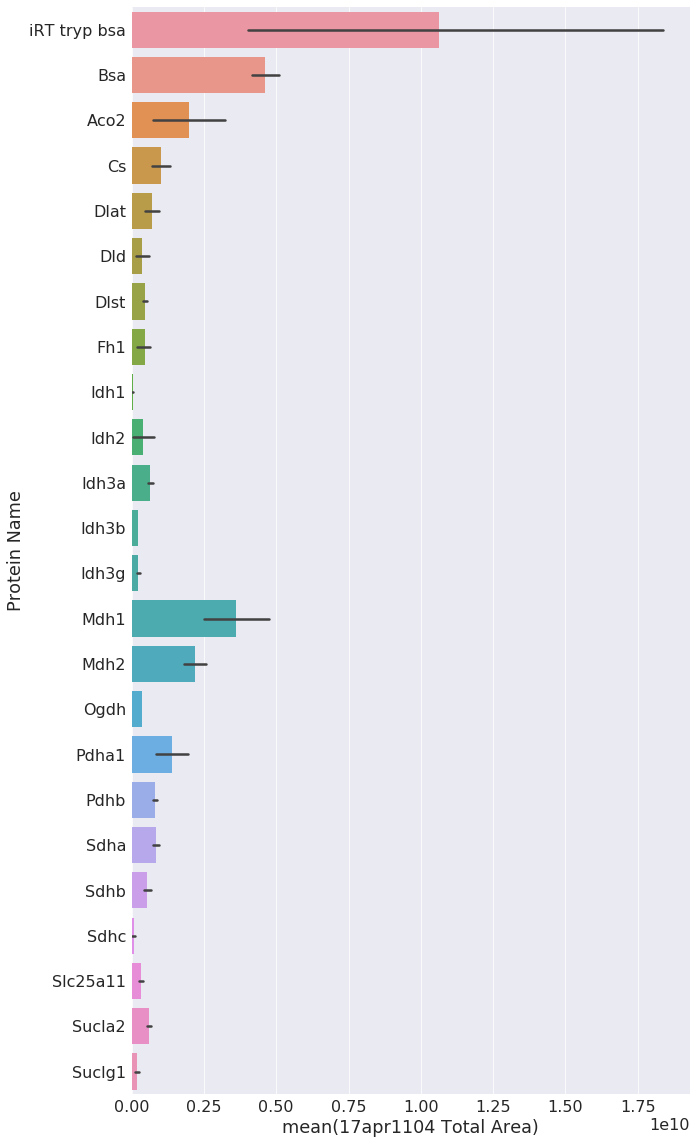

In [14]:
plt.figure(figsize=(10,20));
sns.barplot(y='Protein Name', x='17apr1104 Total Area', data=r);

Draw same histogram but for all the measurements at once:

In [53]:
# drop the 'Peptide column, it will interfere because having string values:
r_melted = r.drop('Peptide',1)
# melt the data frame (make more rows from columns)
r_melted = pd.melt(r_melted, id_vars = 'Protein Name')
# change column names:
r_melted.columns = ['Protein Name', 'Measurement', 'Area']
r_melted.head()

,Protein Name,Measurement,Area
0,iRT tryp bsa,17apr1104 Total Area,12735518720
1,iRT tryp bsa,17apr1104 Total Area,4170007552
2,iRT tryp bsa,17apr1104 Total Area,5502628864
3,iRT tryp bsa,17apr1104 Total Area,37694287872
4,iRT tryp bsa,17apr1104 Total Area,4523052544


/home/perza/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


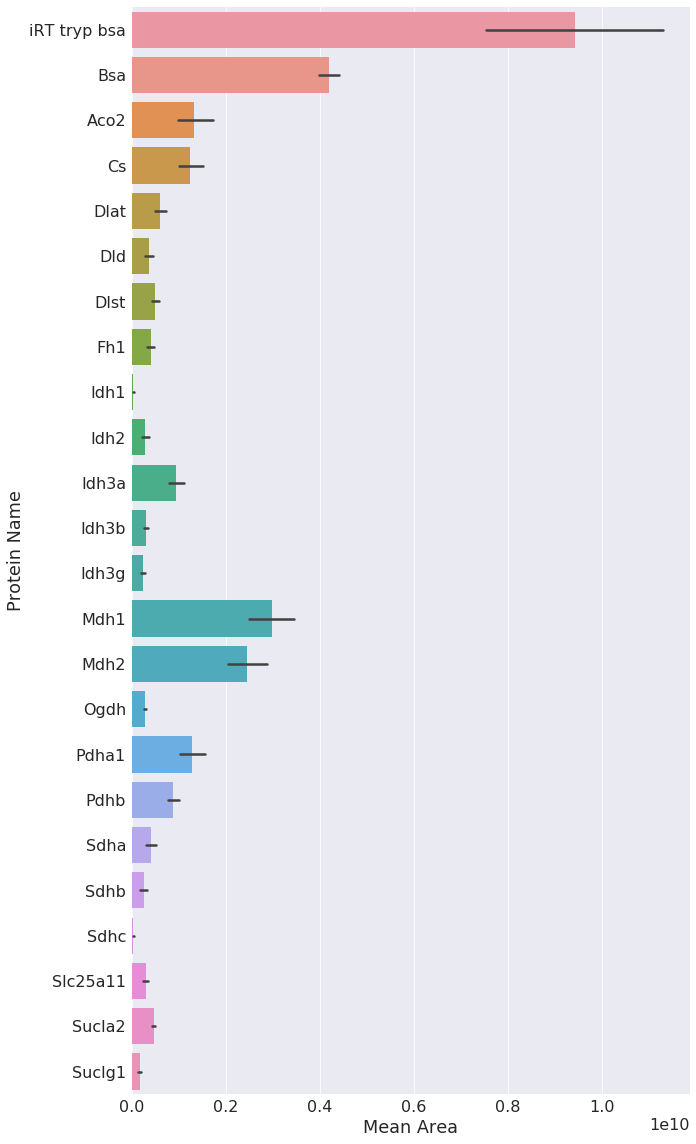

In [55]:
plt.figure(figsize=(10,20))
sns.barplot(y='Protein Name', x='Area', data=r_melted);
plt.xlabel('Mean Area')

## Exercise
Write a function that takes in a list as an argument and returns a mean of this list.

In [ ]:
def mean(l):
    # Write stuff here
    # mu is a single number
    return mu

This will be very useful later. You can write basically any function that takes in a list-like argument and does something with it, and plug it in the pandas .apply() method, like so:

> d.apply(lambda x: my_function(x))

For example, with numpy:

> d.apply(lambda x: np.mean(x))

(lambdas are tiny temporary functions that are defined only for a specific porpose.)

Try it with the mean() function you wrote!